<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_14_06_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [3]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Parse date column and sort
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values('Sampling Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][['Sampling Date', 'RSPM/PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index('Sampling Date').resample('D').mean()

df.head()
city_df.head()

,RSPM/PM10
Sampling Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


from matplotlib import pyplot as plt
_df_0['RSPM/PM10'].plot(kind='hist', bins=20, title='RSPM/PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RSPM/PM10'].plot(kind='line', figsize=(8, 4), title='RSPM/PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

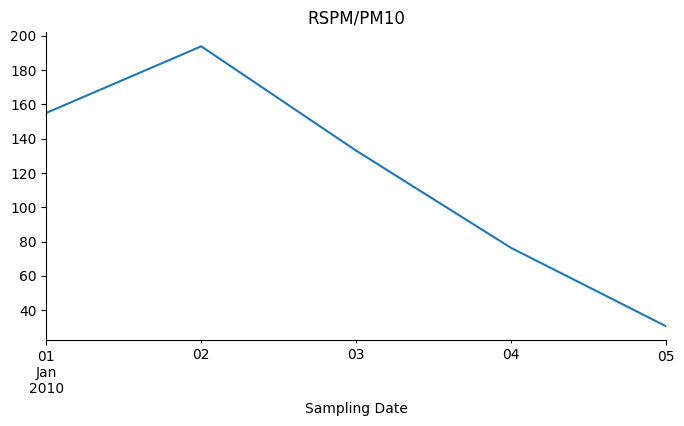

In [4]:
from matplotlib import pyplot as plt
_df_1['RSPM/PM10'].plot(kind='line', figsize=(8, 4), title='RSPM/PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

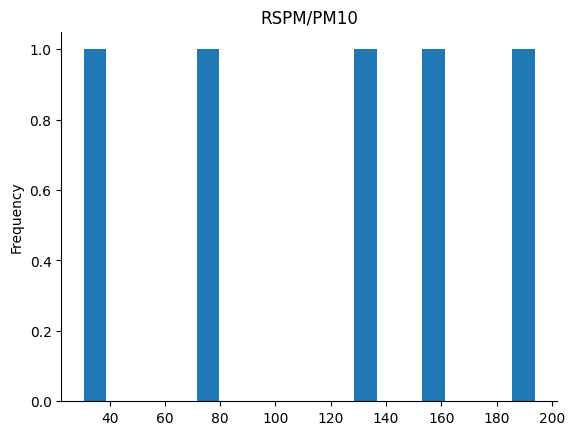

In [5]:
from matplotlib import pyplot as plt
_df_0['RSPM/PM10'].plot(kind='hist', bins=20, title='RSPM/PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **3.ARIMA Forecasting**

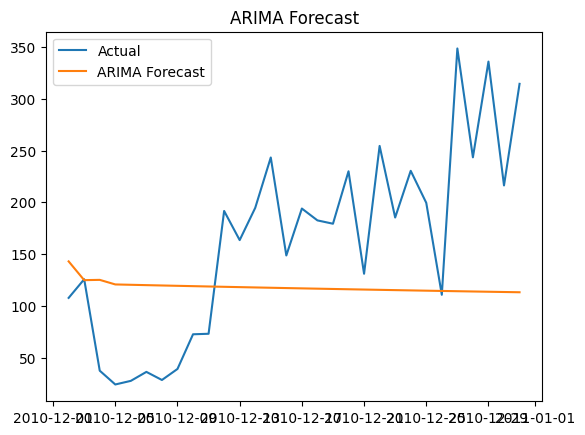

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train, test = city_df[:-30], city_df[-30:]

model = ARIMA(train, order=(1, 0, 4 ))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0506
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0304
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0288
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0306
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0259
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0226
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0300
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0247
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0234
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0277
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0229
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0255
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209
Epoch 16/20
21/

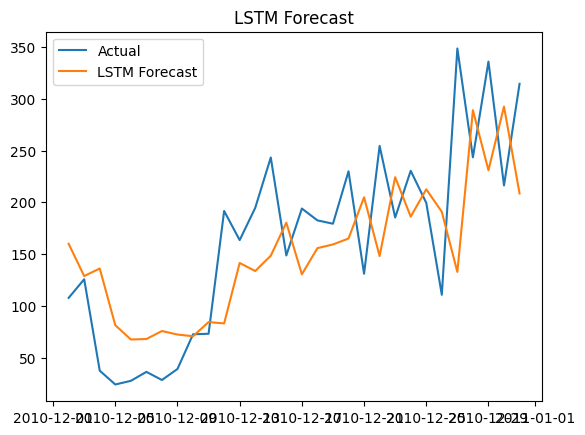

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(city_df)

# Create sequences
def create_sequences(data, lookback=10):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten


# Split into train/test
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16)

# Forecast
preds = model.predict(X_test)
preds_inverse = scaler.inverse_transform(preds)

# Plot
plt.plot(city_df.index[-30:], scaler.inverse_transform(y_test), label='Actual')
plt.plot(city_df.index[-30:], preds_inverse, label='LSTM Forecast')
plt.legend()
plt.title('LSTM Forecast')
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0699
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0276
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0311
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0295
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 
Epoch 16/20
21/21 ━━━━━━━━━

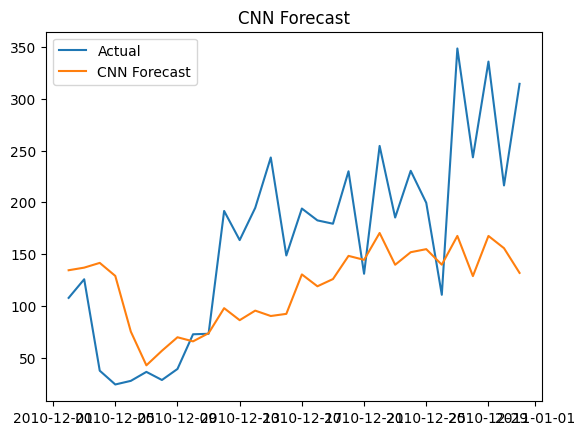

In [10]:
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))  # reshape for CNN

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_cnn[:-30], y[:-30], epochs=20, batch_size=16)

preds_cnn = model.predict(X_cnn[-30:])
preds_cnn_inverse = scaler.inverse_transform(preds_cnn)

plt.plot(city_df.index[-30:], scaler.inverse_transform(y[-30:]), label='Actual')
plt.plot(city_df.index[-30:], preds_cnn_inverse, label='CNN Forecast')
plt.legend()
plt.title('CNN Forecast')
plt.show()
